In [1]:
from sklearn.datasets import make_classification
x,y = make_classification(n_samples=1000, n_features=2,n_redundant=0,n_informative=1,n_clusters_per_class=1,random_state= 0)
print(x)
print(y)


[[ 1.24845579e-03  8.46785926e-01]
 [-1.80814393e+00 -9.68134744e-01]
 [-7.39935853e-01  8.78440249e-01]
 ...
 [-8.62267000e-01 -1.61861221e-01]
 [-5.99280027e-02 -1.52341124e+00]
 [-4.67441010e-01  8.74879721e-01]]
[1 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1 0 1 0 0 0 0 1 1 1 0 0 1
 1 0 1 1 0 0 0 0 1 0 1 0 1 1 1 0 0 1 1 1 0 1 0 1 1 0 0 1 1 1 1 1 0 1 0 1 0
 1 1 0 0 1 1 1 1 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0 1 0 1 1 0 1 0 0 1 1 0 0 0 1
 1 0 0 1 0 0 1 1 0 0 0 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 1 1 1 1 0 0 0 0 0 0
 1 0 1 0 1 1 0 1 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 1
 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 0 0 1 0 1 0 1 0 1 1 0 1 1 0 1 1 1 1
 1 0 1 0 0 0 0 1 1 1 0 1 0 1 1 0 0 0 1 1 1 1 0 1 0 1 0 1 0 0 1 1 0 1 0 0 0
 0 1 1 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1
 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 0 1 1 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0
 0 1 1 1 0 0 1 1 1 0 1 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 1 1
 0 1 1 0 1 1 1 0 1 1 1 0 0 0 0 1 0

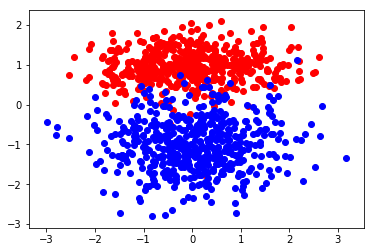

In [3]:
from matplotlib import pyplot as plt
# 正例和负例表示
positive_x1 = [x[i,0] for i in range(1000) if y[i] == 1]
positive_x2 = [x[i,1] for i in range(1000) if y[i] == 1]
negetive_x1 = [x[i,0] for i in range(1000) if y[i] == 0]
negetive_x2 = [x[i,1] for i in range(1000) if y[i] == 0]

plt.scatter(positive_x1,positive_x2,c='red')
plt.scatter(negetive_x1,negetive_x2,c='blue')

In [4]:
from sklearn.model_selection import train_test_split
#训练数据和测试数据
x_data_train, x_data_test, y_data_train, y_data_test = train_test_split(x, y, random_state=0)

In [12]:
import random
import numpy as np
def trainperceptron(data, label):
    """
        训练模型
        eta: learning rate
    """
    eta = 0.0001
    weight = [0.0] * (len(data[0]))
    bias = 0
    correct_count = 0

    flag = True
    while flag:
        index = random.randint(0, len(label) - 1)
        x=list(data[index])
        if label[index] == 1:
            y = 1
        else:
            y = -1

        for i in range(len(weight)):
            weight[i] += eta * (y * x[i])
            bias = bias + eta * y
        if np.any((weight[i]*x[i]*y) > 0):
            correct_count += 1
            if correct_count > 10000:
                break
            continue
    return weight, bias

In [13]:
# 训练，打印参数
weight, bias = trainperceptron(x_data_train, y_data_train)
print(weight ,bias )


[-0.031150222203299507, 1.0130559244177906] -0.006800000000000005


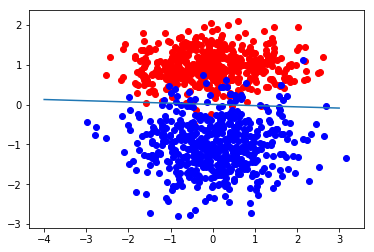

In [14]:
plt.scatter(positive_x1,positive_x2,c='red')
plt.scatter(negetive_x1,negetive_x2,c='blue')
#画出超平面
line_x = np.arange(-4,4)
line_y = line_x * (weight[0]/weight[1]) - bias
plt.plot(line_x,line_y)
plt.show()

In [17]:
from sklearn.metrics import accuracy_score

def predict_1(x,weight,bias):
        wx = 0
        for i in range(len(weight )):
            wx += weight[i] * x[i] + bias

        return int(wx > 0)

def predict(features,weight,bias):
        predict_labels = []
        for feature in features:
            x = list(feature)
            x.append(1)
            predict_labels.append(predict_1(x,weight,bias))
        return predict_labels
    
# 使用测试集预测
test_predict = predict(x_data_test,weight,bias)

# 计算准确率
score = accuracy_score(y_data_test , test_predict)
print("The accuracy score is ", score)

The accuracy score is  0.968
